In [31]:
# imported libraries
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import demoji
import re
import string

In [7]:
df = pd.read_csv('Yurtici_Kargo_Tweets.csv')

In [8]:
df.head() # by deafult gives us first 5 rows

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-31 07:55:51+00:00,YurticiKargo,Yurtiçi Kargo'da kıdem ödül törenleri tüm hızı...
1,1,2022-10-28 08:47:30+00:00,Klemantinn,#yurtiçikargo hem kurye üslubunuz hem de müşte...
2,2,2022-10-28 06:18:18+00:00,YurticiKargo,Kamuoyuna saygıyla... #29Ekim Cumhuriyet Bayra...
3,3,2022-10-26 08:07:29+00:00,YurticiKargo,Kıdemli personelimizi ödüllendirmeye devam edi...
4,4,2022-10-25 06:51:44+00:00,YurticiKargo,Türkiye genelinde kıdemli personelimizi ödülle...


In [9]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9467 entries, 0 to 9466
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   9467 non-null   int64 
 1   Date    9467 non-null   object
 2   User    9467 non-null   object
 3   Tweet   9467 non-null   object
dtypes: int64(1), object(3)
memory usage: 296.0+ KB


In [16]:
df['wordcount_bc'] = df['Tweet'].map(lambda x:len(x.split()))

In [17]:
df.head()

,index,Date,User,Tweet,wordcount_bc
0,0,2022-10-31 07:55:51+00:00,YurticiKargo,Yurtiçi Kargo'da kıdem ödül törenleri tüm hızı...,33
1,1,2022-10-28 08:47:30+00:00,Klemantinn,#yurtiçikargo hem kurye üslubunuz hem de müşte...,10
2,2,2022-10-28 06:18:18+00:00,YurticiKargo,Kamuoyuna saygıyla... #29Ekim Cumhuriyet Bayra...,10
3,3,2022-10-26 08:07:29+00:00,YurticiKargo,Kıdemli personelimizi ödüllendirmeye devam edi...,26
4,4,2022-10-25 06:51:44+00:00,YurticiKargo,Türkiye genelinde kıdemli personelimizi ödülle...,28


Word Distribution Before cleaning Tweets('@','#','https://...',...)

In [18]:
pd.DataFrame(df['wordcount_bc'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_bc,9467.0,19.163198,9.768247,2.0,11.0,18.0,27.0,46.0


<AxesSubplot: xlabel='wordcount_bc', ylabel='Count'>

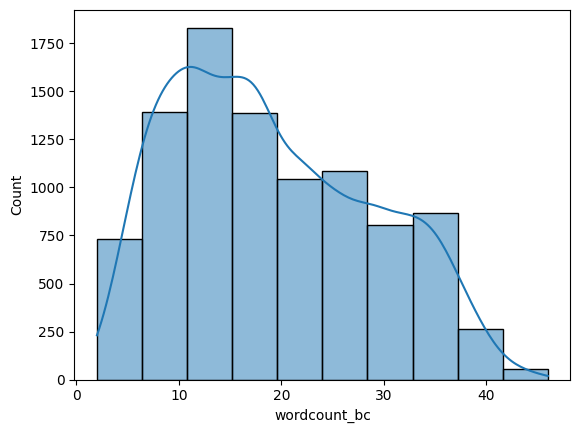

In [19]:
sb.histplot(data=df['wordcount_bc'],bins=10,kde=True)

Cleaning Tweets

In [20]:
def clean_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+|\#','',tweet) # this is for removing # and @ mentions 
    tweet= tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE) # removing https links 
    tweet = demoji.replace(tweet,"")
    tweet = re.sub('\n',' ',tweet) # remove \n
    return tweet

In [21]:
df['cleanTweets'] = df['Tweet'].map(clean_tweets)

In [22]:
df['wordcount_after_cleaning'] = df['cleanTweets'].map(lambda x:len(x.split()))

In [23]:
df.head()

,index,Date,User,Tweet,wordcount_bc,cleanTweets,wordcount_after_cleaning
0,0,2022-10-31 07:55:51+00:00,YurticiKargo,Yurtiçi Kargo'da kıdem ödül törenleri tüm hızı...,33,yurtiçi kargoda kıdem ödül törenleri tüm hızıy...,31
1,1,2022-10-28 08:47:30+00:00,Klemantinn,#yurtiçikargo hem kurye üslubunuz hem de müşte...,10,yurtiçikargo hem kurye üslubunuz hem de müşter...,10
2,2,2022-10-28 06:18:18+00:00,YurticiKargo,Kamuoyuna saygıyla... #29Ekim Cumhuriyet Bayra...,10,kamuoyuna saygıyla 29ekim cumhuriyet bayramımı...,9
3,3,2022-10-26 08:07:29+00:00,YurticiKargo,Kıdemli personelimizi ödüllendirmeye devam edi...,26,kıdemli personelimizi ödüllendirmeye devam edi...,24
4,4,2022-10-25 06:51:44+00:00,YurticiKargo,Türkiye genelinde kıdemli personelimizi ödülle...,28,türkiye genelinde kıdemli personelimizi ödülle...,26


In [24]:
pd.DataFrame(df['wordcount_after_cleaning'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_after_cleaning,9467.0,18.141967,9.617056,1.0,10.0,17.0,25.0,46.0


In [25]:
df.describe()

,index,wordcount_bc,wordcount_after_cleaning
count,9467.000000,9467.000000,9467.000000
mean,4733.000000,19.163198,18.141967
std,2733.031833,9.768247,9.617056
min,0.000000,2.000000,1.000000
25%,2366.500000,11.000000,10.000000
50%,4733.000000,18.000000,17.000000
75%,7099.500000,27.000000,25.000000
max,9466.000000,46.000000,46.000000


<AxesSubplot: xlabel='wordcount_after_cleaning', ylabel='Count'>

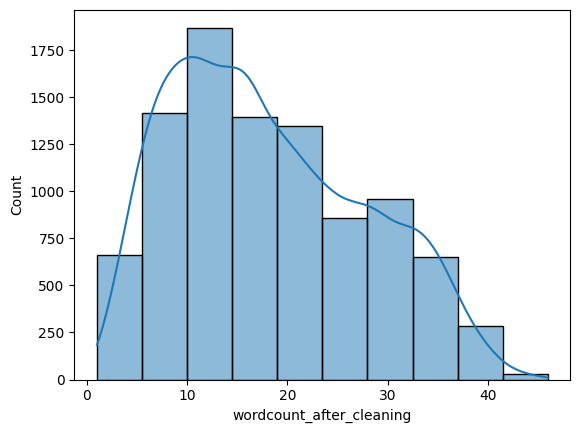

In [26]:
sb.histplot(data=df['wordcount_after_cleaning'],bins=10,kde=True)

In [27]:
df.head()

,index,Date,User,Tweet,wordcount_bc,cleanTweets,wordcount_after_cleaning
0,0,2022-10-31 07:55:51+00:00,YurticiKargo,Yurtiçi Kargo'da kıdem ödül törenleri tüm hızı...,33,yurtiçi kargoda kıdem ödül törenleri tüm hızıy...,31
1,1,2022-10-28 08:47:30+00:00,Klemantinn,#yurtiçikargo hem kurye üslubunuz hem de müşte...,10,yurtiçikargo hem kurye üslubunuz hem de müşter...,10
2,2,2022-10-28 06:18:18+00:00,YurticiKargo,Kamuoyuna saygıyla... #29Ekim Cumhuriyet Bayra...,10,kamuoyuna saygıyla 29ekim cumhuriyet bayramımı...,9
3,3,2022-10-26 08:07:29+00:00,YurticiKargo,Kıdemli personelimizi ödüllendirmeye devam edi...,26,kıdemli personelimizi ödüllendirmeye devam edi...,24
4,4,2022-10-25 06:51:44+00:00,YurticiKargo,Türkiye genelinde kıdemli personelimizi ödülle...,28,türkiye genelinde kıdemli personelimizi ödülle...,26


In [28]:
for i in list(df.sample(15, random_state=1).index):
    print(df.loc[i]['cleanTweets'])

   araskargo ve yurtiçikargo ile kıyaslayınca yine pttkargo hakketen kargo şirketi mngkargo ve süratkargo yu saymıyorum bile
yurticikargo tabi bir tane elemanlarınızı ve şubenizi şikayet edeceğimiz numaranız bile yok her zaman haksız olacağınızı biliyorsunuz
 özde firma olunması ümidiyle umarım çözülür 2 gündür beklediğim gibi geri dönüş olacaktır deyip çözebilmeye çalışmaktan çözüm aşamasına geçebiliriz   yurtiçikargo n11 alışveriş kargo
yurtiçikargo   3 defadır farkli firmadan alışveriş yapıyorumhepsi ürünü adrese teslim gönderdim demesine rağmen yurtiçikargo telefon ihbarlı diyorbu işi kargonun kendisi belirliyor galiba yurtiçikargo mersinanıt anıtşube yeter artık sorumsuzluk
yurtici kargoda calisan bi arkadasim soyledi ona da orda calisan bi arkadasi soyledi burasi urla izmir yurtici subesi kargolar karantina altindaymis rakamlari basin yansitmiyormus ve  teslimatlar evde yokuz bahanesiyle dagitilmamis yurticikargo coronatuerkiye
yurticikargo rezaleti bu akşam bahçemdeki dolabın iç

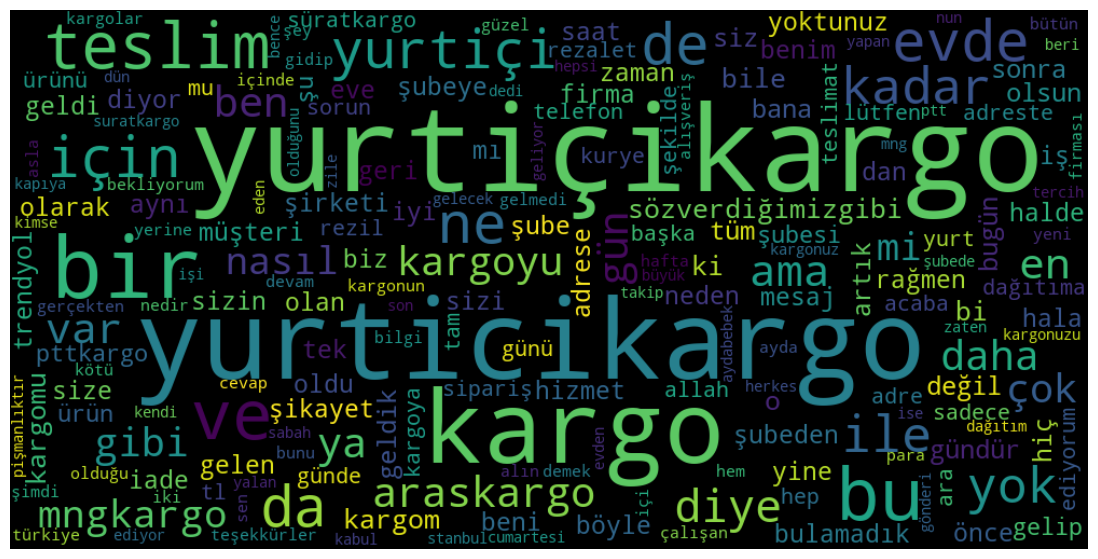

In [33]:
# ploting word cloud

allWords = ' '.join([twts for twts in df['cleanTweets']])
wordCloud = WordCloud(width= 1000,height=500,random_state=35,max_font_size=110,collocations=False).generate(allWords)

figure = plt.figure(figsize=(15,7))
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()